In [12]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def chi_square(x : list, observed : list, m, b, uncertainties) -> float: 
    lst = []
    err = uncertainties
    for i in range(len(observed)): 
        lst.append(((observed[i] - (x[i] * m + b)) / err[i]) ** 2)
    return sum(lst)

def linear_fit(xlst, ylst, err): 
    plt.errorbar(x, y, yerr = err, fmt = "o")
    xlst = np.array(xlst)
    ylst = np.array(ylst)
    [b, a], V = np.polyfit(xlst, ylst, 1, cov = True)
    plt.plot(xlst, b * xlst + a)
    a_err, b_err = V[0][0], V[1, 1]
    print("b parameter: " + str(b) + " +/- " + str(np.sqrt(b_err)))
    print("a parameter: " + str(a) + " +/- " + str(np.sqrt(a_err)))
    
    plt.show()
    return b, a

def average(lst): 
    return sum(lst) / len(lst)

def omega(angle): 
    return (angle ** 2) * math.pi / 4

def uncert(xlst): 
    avg = average(xlst)
    s = 0
    for x in xlst: 
        s += (x - avg) ** 2
    return (s / (len(xlst) - 1)) ** 0.5

b parameter: -4.528709677419354 +/- 0.8482832942752782
a parameter: 57.80806451612902 +/- 0.10802286149523728


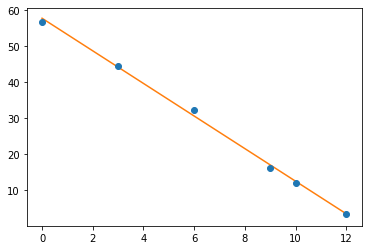

19.292645161290285


In [3]:
x = [0, 3, 6, 9, 10, 12] 
y = [56.9, 44.6, 32.4, 16.3, 12.1, 3.4]
err = [0.5] * 6

b, a = linear_fit(x, y, err)


print(chi_square(x, y, b, a, err))

In [4]:
# def get_angle(o, a):
#     return np.arctan(o / a)

# print(f"angle of beam width in radians: {get_angle(4.5, 30)}")
# print(f"angle of beam width in degrees: {get_angle(4.5, 30) * 180 / math.pi}")
    

In [5]:
print(np.arcsin(1.2 * 2.46/46))
print(np.arcsin(1.2 * 2.46/46) * 180 / math.pi)

0.0642180426842336
3.679422814397558


In [32]:
T1 = 298.15
T2 = 77
D2 = average([41.3, 41.4, 41.5, 41.4])

def sample_variance(average, data): 
    s = 0
    for d in data: 
        s += (d - average) ** 2
    return s / (len(data) - 1)

print(D2)
D2_uncert = sample_variance(D2, [41.3, 41.4, 41.5, 41.4])
print(D2_uncert)


alpha = (D2 - a) / (-10 * b)
T0 = (T1 * (10 ** alpha)) - T2
T0 = T0 / (1 - 10 ** alpha)
print(f"T0: {T0}")

41.4
0.006666666666666856
T0: 92.71114906308662


In [34]:
D = [87.2, 90, 88, 91, 92, 90]
print(uncert(D))
D = average(D)
print(D)
a2 = (D - a)/(-10 * b)
T = 10 ** a2 * (T1 + T0) - T0


print(f"T: {T}")

# omegaAntenna = 0.0642180426842336 * 0.0642180426842336 * 3.14 / 4
omegaAntenna = 0.1160644 * 0.1160644 * 3.14 / 4
omegaSun =  6 * 10 ** -5


final = T * omegaAntenna - 3 * (omegaAntenna - omegaSun)
final = final / omegaSun
print(f"Temperature of the Sun in K: {final:,}")

1.805547008526778
89.7
T: 1885.3482506063715
Temperature of the Sun in K: 331,757.209661785


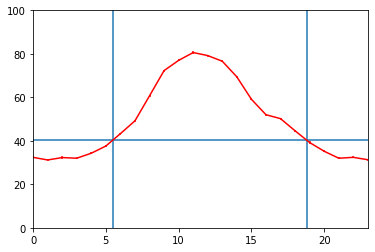

In [8]:
x = list(np.arange(24))
y = [32.4, 31.2, 32.3, 32.0, 34.3, 37.6, 43.3, 49.2, 60.7, 72.3, 77.0, 80.6, 79.2, 76.6, 69.4, 59.1, 52.0, 50.2, 44.6, 39.2, 35.2, 32.0, 32.4, 31.3]
err = [0.5] * 24

plt.errorbar(x, y, yerr = err, fmt = "r")
ax = plt.gca()
ax.set_ylim([0, 100])
ax.set_xlim([0, 23])
plt.axhline(y = 40.3)
plt.axvline(x=5.5)
plt.axvline(x=18.8)
plt.show()

In [24]:
total_percent_uncertainty = .1 / 6.65 + .11/57.8 + .85/4.52
print(f"Uncertainty in theoretical measurement = {total_percent_uncertainty * 101565.29593509044}")
print(f"Uncertainty in experimental measurement = {total_percent_uncertainty * 331757.209661785}")

Uncertainty in theoretical measurement = 20820.256522189033
Uncertainty in experimental measurement = 68008.17291625275
